<a href="https://colab.research.google.com/github/Ch0ro/ML-DL/blob/master/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생선 분류 문제
#### 도미(Bream)와 빙어(Smelt) 소량데이터 분류

In [12]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**전체 데이터 df에서 도미(Bream)와 빙어(Smelt) 데이터 분류**

In [30]:
data_Bream = df[df['Species']=='Bream']
bream_length = data_Bream['Length2']
bream_weigth = data_Bream['Weight']

In [31]:
data_Smelt = df[df['Species']=='Smelt']
smelt_length = data_Smelt['Length2']
smelt_weigth = data_Smelt['Weight']

### 산점도(Scatter Plot)
##### x축 길이, y축 무게



In [32]:
import matplotlib.pyplot as plt

**도미 데이터 산점도**

<function matplotlib.pyplot.show>

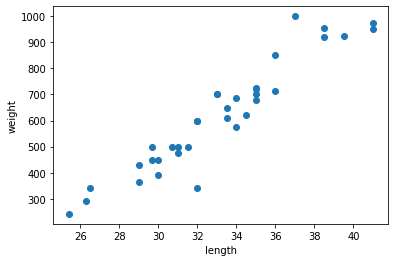

In [33]:
plt.scatter(bream_length,bream_weigth)
plt.xlabel('length')
plt.ylabel('weight')
plt.show



*   도미의 길이가 커질수록 무게 역시 증가하는 추세를 보이고있다.
*   산점도 그래프가 양의 선형을 띄고있다. 



**빙어 데이터 산점도**

<function matplotlib.pyplot.show>

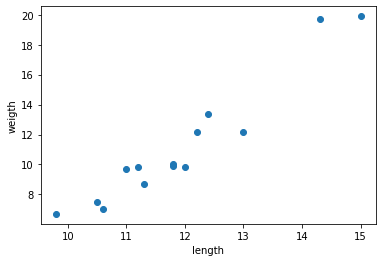

In [34]:
plt.scatter(smelt_length,smelt_weigth)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show

**도미 + 빙어 산점도**

<function matplotlib.pyplot.show>

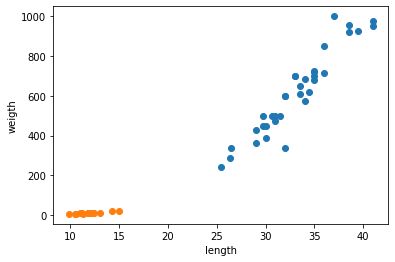

In [35]:
plt.scatter(bream_length,bream_weigth)
plt.scatter(smelt_length,smelt_weigth)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show



*   빙어는 도미에 비해 표본의 개수가 너무 적고, 길이에 따른 무게의 변화가 크지 않다.
*   선형적이라고 생각할 수 있지만, 변화가 크지 않아 빙어의 경우 길이와 무게의 상관도가 적다고 판단하겠다.



### K-최근접 이웃 알고리즘을 활용한 생선 분류

In [44]:
length = list(bream_length) + list(smelt_length)
weigth = list(bream_weigth) + list(smelt_weigth)
# 도미와 빙어 각각의 lenght와 weight 시리즈들을 2차원 리스트로 만듦
fish_data = [[l,w] for l,w in zip(length,weigth)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

**정답 데이터(target data) 도미 - 1 , 빙어 - 0 으로 생성**
>
**35개(도미 수)의 1과 14개(방어 수)의 0으로 구성**

In [45]:
fish_target = [1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [46]:
# k-최근접 이웃 알고리즘 구현을 위한 사이킷런 패키지 임포트
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kn = KNeighborsClassifier()
kn.fit(fish_data,fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
kn.score(fish_data,fish_target)

1.0

In [49]:
kn.predict([[30,600]])

array([1])



*   score는 정확도를 뜻하며 범위는 0~1이다.
*   1에 가까울 수록 정확도 100%라는 뜻인데, 이 모델의 경우 정확도 100%를 보여주고 있다.
*   predict는 새로운 값을 대입했을 때, 어느 집단에 속할지 예측해주는 것이다.

*   길이 30, 무게 600에 대한 값은 1 즉, 도미로 예측하고있다.





---

## K-최근접 알고리즘
##### 이 알고리즘은 기본적으로 데이터가 모두 준비되어 있어야 한다.
##### 데이터가 아주 많은 경우 이용하기 어렵다.
##### fit()메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 빙어인지 구분한다.
##### 가까운 몇 개의 데이터를 참고할지는 정하기 나름이나, 기본값은 5이다.

*기본값을 데이터 전체 개수인 49로 바꿔보면?*

In [50]:
kn49 = KNeighborsClassifier(n_neighbors=49) #kn49 모델 생성
kn49.fit(fish_data,fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [52]:
kn49.score(fish_data,fish_target) #kn49 모델의 정확도

0.7142857142857143

In [53]:
kn49.predict([[30,600]])

array([1])



*   이전 모델(n_neighbors=5가 기본값인 모델)보다 정확도가 떨어진다.
*   이 값은 35/49(도미의 수 / 전체 생선 수) 값과 같다. 
*   주변 데이터 5개만 봤으면 5개 모두 도미 데이터라 정확도가 1이 나온 것!



